In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [3]:
df = pd.read_csv('jordan.csv')

In [4]:
df.dtypes

Year                int64
Planted Area      float64
Harvested Area    float64
Temp_mean         float64
Temp_min          float64
Temp_max          float64
Precipitation     float64
Average Yield     float64
crop               object
Production        float64
dtype: object

In [5]:
# One-Hot Encode categorical features (if any)
categorical_features = [col for col in df if df[col].dtype == object]
for col in categorical_features:
    df = pd.get_dummies(df, columns=[col])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Planted Area    120 non-null    float64
 2   Harvested Area  120 non-null    float64
 3   Temp_mean       120 non-null    float64
 4   Temp_min        120 non-null    float64
 5   Temp_max        120 non-null    float64
 6   Precipitation   120 non-null    float64
 7   Average Yield   120 non-null    float64
 8   Production      120 non-null    float64
 9   crop_Barley     120 non-null    bool   
 10  crop_Chickpea   120 non-null    bool   
 11  crop_Lentil     120 non-null    bool   
 12  crop_Vetch      120 non-null    bool   
 13  crop_Wheat      120 non-null    bool   
dtypes: bool(5), float64(8), int64(1)
memory usage: 9.2 KB


In [7]:
X = df.drop(['Production'], axis=1)
y = df['Production']

## Transform

In [8]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

In [9]:
Y_log = np.log(y + 1)
print("Original target:", y)
print("Log-transformed target:", Y_log)

Original target: 0       9250.5
1      25433.7
2      19293.0
3      43770.8
4      42526.0
        ...   
115      371.6
116       38.4
117      819.1
118     1012.5
119      570.0
Name: Production, Length: 120, dtype: float64
Log-transformed target: 0       9.132541
1      10.143870
2       9.867549
3      10.686745
4      10.657894
         ...    
115     5.920505
116     3.673766
117     6.709426
118     6.921165
119     6.347389
Name: Production, Length: 120, dtype: float64


In [10]:
print(X_transformed.shape)
print(Y_log.shape)

(120, 13)
(120,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_log, test_size=0.2, random_state=42)

In [12]:
model = Ridge(alpha=1.0) # Adjust alpha for regularization strength
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math
# After making predictions on the testing set (y_pred)
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)
# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("RMSE:", math.sqrt(mse))

Mean Absolute Error (MAE): 0.1265279365823584
Mean Squared Error (MSE): 0.03528931815266983
R-squared: 0.9926036075680406
RMSE: 0.18785451326137956


In [14]:
print(X.shape)
print(y.shape)

(120, 13)
(120,)


In [15]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
  """Calculates the Root Mean Squared Error (RMSE)"""
  return np.sqrt(mean_squared_error(y_test, predictions))

rmse_val = rmse(y_test, predictions)
print("RMSE:", rmse_val)

RMSE: 0.18785451326137956


Mean Absolute Percentage Error: 1.4531202309955467


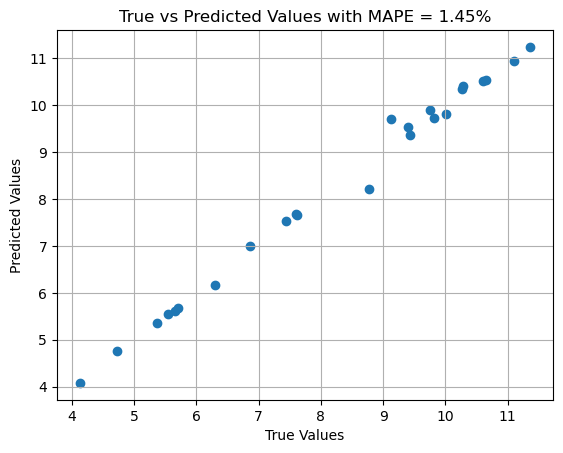

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def mean_absolute_percentage_error(y_test, predictions):
  """Calculates the Mean Absolute Percentage Error (MAPE)"""
  y_test, predictions = np.array(y_test), np.array(predictions)
  return np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error:", mape)

# Create scatter plot
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values with MAPE = {mape:.2f}%")
plt.grid(True)
plt.show()

In [17]:
# Create a DataFrame
dfp = pd.DataFrame({'True Values': y_test, 'Predicted Values': predictions})
# Calculate the difference
dfp['Difference'] = abs(dfp['True Values'] - dfp['Predicted Values'])
# Sort by difference
df_sorted = dfp.sort_values(by='Difference', ascending=False)
print(df_sorted)

     True Values  Predicted Values  Difference
0       9.132541          9.705648    0.573107
91      8.766706          8.224117    0.542589
11     10.004536          9.816801    0.187735
44     11.106747         10.952364    0.154383
26      9.760166          9.898174    0.138008
70      6.867662          7.004162    0.136500
107     6.293789          6.160421    0.133368
18      9.401902          9.534929    0.133027
36     10.284879         10.408459    0.123580
45     11.369238         11.245686    0.123552
4      10.657894         10.549693    0.108202
31      9.822202          9.724579    0.097623
40     10.608731         10.513808    0.094924
73      7.597246          7.685588    0.088342
88      7.443839          7.527730    0.083891
47     10.267436         10.348852    0.081416
10      9.432283          9.377102    0.055182
89      7.612633          7.662142    0.049508
64      4.122284          4.080121    0.042163
55      5.711420          5.682543    0.028877
104     5.650

In [22]:
dfpr = pd.read_csv('prediction.csv')
categorical_features = [col for col in dfpr if dfpr[col].dtype == object]
for col in categorical_features:
    dfpr = pd.get_dummies(dfpr, columns=[col])

In [23]:
predictions2 = model.predict(dfpr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [25]:
print(predictions2)

[217701.88633937 217701.91406768 217701.941796   217701.96952431
 217701.99725263 538272.11199444 538272.13972275 538272.16745107
 538272.19517938 538272.2229077   10197.44160468  10197.46933299
  10197.49706131  10197.52478962  10197.55251794  10532.3107238
  10532.33845211  10532.36618043  10532.39390874  10532.42163706
   6301.90385555   9511.66281822   6445.99271296   5500.77226935
   6356.71558143   6823.49678903]
